In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [22]:
# Load your dataset (replace 'your_dataset.csv' with your file)
HouseData = pd.read_csv('Housedata.csv')

In [23]:
# displayign first few rows of housing data 
HouseData.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [24]:
#describing missing value in data
print(HouseData.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [25]:
#describing data
print(HouseData.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [26]:
# Preprocessing: Selecting features and target variable
x = HouseData[['sqft_living','bedrooms','bathrooms']]
y = HouseData['price']

In [27]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
# Building the Linear Regression Model
model = LinearRegression()

In [29]:
#Fitting the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# Model Evaluation
y_pred = model.predict(x_test)

In [31]:
#Mean Squared Error and R-Squared for model evaluation
m = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)

print('Mean Squared Error:', m)
print('R-squared:',r)

Mean Squared Error: 991204834716.4656
R-squared: 0.02808413801636722


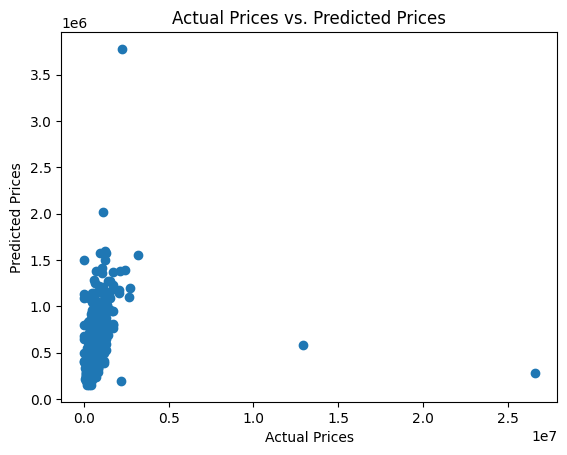

In [32]:
# PREDICTIONS AND VISUALIZATION
# For visualizing the predictions against actual prices, i am using a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

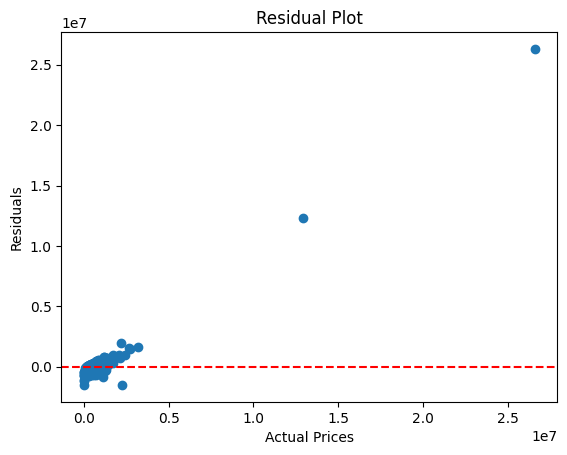

In [34]:
# I am showing a residual plot to check the model's performance 
res = y_test - y_pred
plt.scatter(y_test, res)
plt.axhline(y=0, color='red', linestyle ='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [36]:
# Now, I am using the trained model to make predictions on new data and visualizw the results
new_data =[[1500, 3, 2]]
pred_price = model.predict(new_data)

print('Predicted Price:', pred_price[0])

Predicted Price: 375710.1349228737


D:\Python\Python Installation file\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
